# IC Poly Regression with Weather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

print('Pandas version :', pd.__version__)
print('Numpy version  :', np.__version__)
print('Matplot version:', matplotlib.__version__);
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sk.__version__)

print('--------------')
print(pd.Timestamp.now())

Pandas version : 2.2.3
Numpy version  : 2.1.3
Matplot version: 3.9.2
Seaborn version: 0.13.2
Sklearn version: 1.5.2
--------------
2025-02-05 11:00:21.317834


In [2]:
def whatis(d):
    print("Type : ", type(d))
    print("Shape: ", d.shape)

In [3]:
df = pd.read_csv('../Data/WeatherDataP_outlier.csv')
df.head()

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pressure (millibars)  25 non-null     float64
 1   Humidity              25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Pressure (millibars),Humidity
count,25.000000,25.000000
mean,1011.481600,0.609200
std,2.873799,0.158874
min,1007.260000,0.360000
25%,1008.360000,0.500000
50%,1012.220000,0.600000
75%,1014.240000,0.780000
max,1014.520000,0.850000


In [6]:
df.columns

Index(['Pressure (millibars)', 'Humidity'], dtype='object')

In [7]:
df.columns = ['press', 'humid']
df.columns

Index(['press', 'humid'], dtype='object')

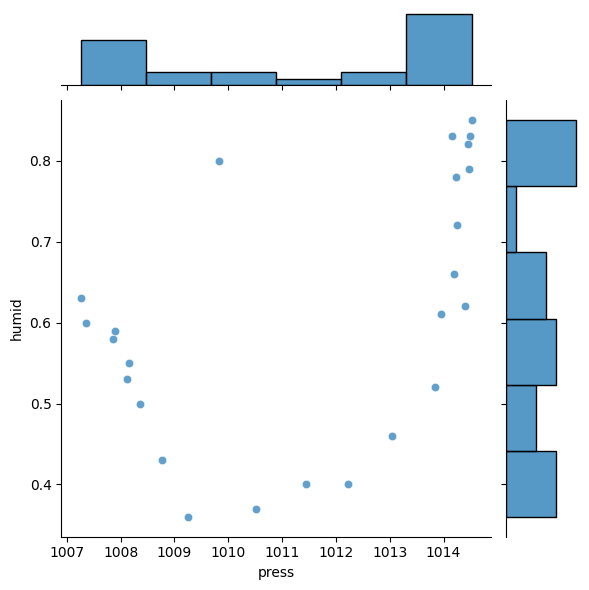

In [8]:
sns.jointplot(x='press', y='humid', data=df, alpha=0.7)

<Axes: xlabel='press', ylabel='humid'>

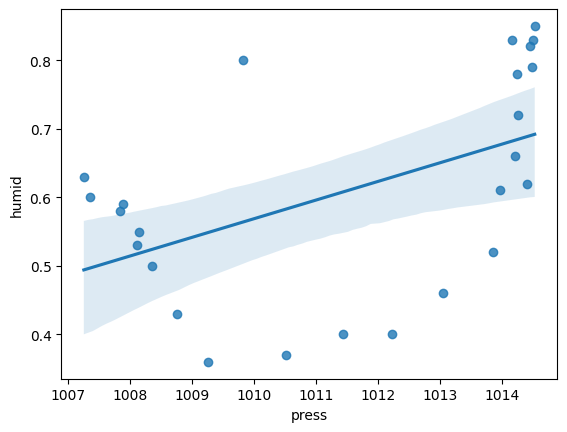

In [9]:
sns.regplot(x='press', y='humid', data=df)

In [10]:
X=pd.DataFrame(df.press)
X.head()

,press
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49


In [11]:
y=df.humid
y.head(), X.shape, y.shape

(0    0.62
 1    0.66
 2    0.79
 3    0.82
 4    0.83
 Name: humid, dtype: float64,
 (25, 1),
 (25,))

# Quick Simple Linear Regression - not splitting the small dataset

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [13]:
print(lm.intercept_)
print(lm.coef_)

-26.946159768377395
[0.02724257]


In [14]:
y_preds = lm.predict(X)
y_preds

array([0.68870472, 0.68325621, 0.6906117 , 0.69006685, 0.69115655,
       0.69197383, 0.6821665 , 0.68434591, 0.68461833, 0.67671799,
       0.67372131, 0.65165482, 0.62931591, 0.60806671, 0.58300354,
       0.56420617, 0.5486779 , 0.53505662, 0.52415959, 0.51734895,
       0.51843865, 0.51026588, 0.51135558, 0.49691702, 0.49419276])

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# variance of the target explained by the independent variables.
# how well the model fits the data. Higher is better.
r2 = r2_score(y, y_preds) 

# Average squared distance between predicted and actual values
# Lower is better  (outliers will exegarate this)
mse = mean_squared_error(y, y_preds)

# Average absolute distance between predicted and actual values
# Lower is better
mae = mean_absolute_error(y, y_preds)

# Starting point of the regression line on the y-axis.
# value of target when independent variables are at zero
intercept = lm.intercept_

print('R2   : %14.3f' %r2)  # same as linreg.score() 
print('MAE  : %14.3f' %mae)
print('MSE  : %14.3f' %mse)
print('RMSE : %14.3f' %math.sqrt(mse))
print('Int  : %14.3f' %intercept)
print('Coef : %14.3f' %lm.coef_[0])
print('Score: %14.3f' %lm.score(X, y))

R2   :          0.243
MAE  :          0.118
MSE  :          0.018
RMSE :          0.135
Int  :        -26.946
Coef :          0.027
Score:          0.243


# Preprocessing

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [17]:
1014*1014

1028196

In [18]:
deg=int(input('How many degrees? '))

How many degrees?  1


In [19]:
pre_process = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = pre_process.fit_transform(X)
X_poly

array([[1014.4 ],
       [1014.2 ],
       [1014.47],
       [1014.45],
       [1014.49],
       [1014.52],
       [1014.16],
       [1014.24],
       [1014.25],
       [1013.96],
       [1013.85],
       [1013.04],
       [1012.22],
       [1011.44],
       [1010.52],
       [1009.83],
       [1009.26],
       [1008.76],
       [1008.36],
       [1008.11],
       [1008.15],
       [1007.85],
       [1007.89],
       [1007.36],
       [1007.26]])

In [20]:
X.head()

,press
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49


## Alternatively (recommended!) - to get Poly Feature terms names, split into fit and transform

In [21]:
pre_process = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = pre_process.fit(X)
poly_feature_names = X_poly.get_feature_names_out(X.columns)
X_poly = pre_process.transform(X)
X_poly, poly_feature_names

(array([[1014.4 ],
        [1014.2 ],
        [1014.47],
        [1014.45],
        [1014.49],
        [1014.52],
        [1014.16],
        [1014.24],
        [1014.25],
        [1013.96],
        [1013.85],
        [1013.04],
        [1012.22],
        [1011.44],
        [1010.52],
        [1009.83],
        [1009.26],
        [1008.76],
        [1008.36],
        [1008.11],
        [1008.15],
        [1007.85],
        [1007.89],
        [1007.36],
        [1007.26]]),
 array(['press'], dtype=object))

In [22]:
X.shape, X_poly.shape

((25, 1), (25, 1))

In [23]:
whatis(X_poly)

Type :  <class 'numpy.ndarray'>
Shape:  (25, 1)


## Linear Regression, Predictions & Residuals

In [24]:
poly_lm = LinearRegression()
poly_lm.fit(X_poly, y)

LinearRegression()

In [25]:
y_preds = poly_lm.predict(X_poly)
y_preds

array([0.68870472, 0.68325621, 0.6906117 , 0.69006685, 0.69115655,
       0.69197383, 0.6821665 , 0.68434591, 0.68461833, 0.67671799,
       0.67372131, 0.65165482, 0.62931591, 0.60806671, 0.58300354,
       0.56420617, 0.5486779 , 0.53505662, 0.52415959, 0.51734895,
       0.51843865, 0.51026588, 0.51135558, 0.49691702, 0.49419276])

In [26]:
y_preds.shape

(25,)

In [27]:
residual = y - y_preds
residual

0    -0.068705
1    -0.023256
2     0.099388
3     0.129933
4     0.138843
5     0.158026
6     0.147833
7     0.095654
8     0.035382
9    -0.066718
10   -0.153721
11   -0.191655
12   -0.229316
13   -0.208067
14   -0.213004
15    0.235794
16   -0.188678
17   -0.105057
18   -0.024160
19    0.012651
20    0.031561
21    0.069734
22    0.078644
23    0.103083
24    0.135807
Name: humid, dtype: float64

## Plot of original data and model (predicted) data

Text(0.5, 1.0, 'Degree = 1')

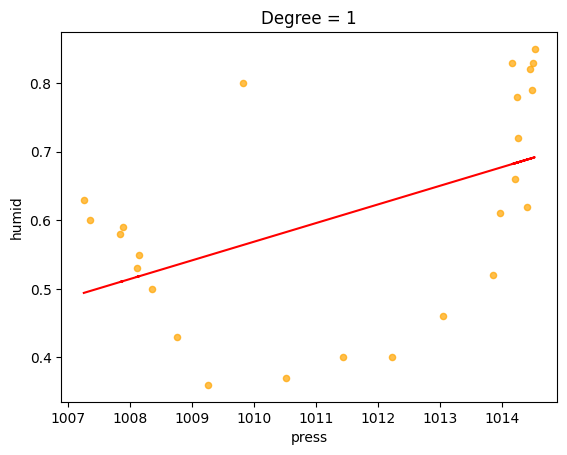

In [28]:
df.plot(x='press', y='humid', kind='scatter', alpha=0.7, c='orange')
plt.plot(X, y_preds, c='red')
plt.title('Degree = %d' %deg)

In [29]:
intercept = poly_lm.intercept_
intercept

np.float64(-26.946159768377395)

In [30]:
#theta1, theta2 = poly_lm.coef_
poly_lm.coef_

array([0.02724257])

## Have the model predict humidity based on input pressure of 1007

In [31]:
y_new = poly_lm.predict(pre_process.fit_transform([[1007]]))
y_new

array([0.48710969])

In [32]:
pre_process.fit_transform([[1007]])

array([[1007.]])

Text(0.5, 1.0, 'Degree = 1')

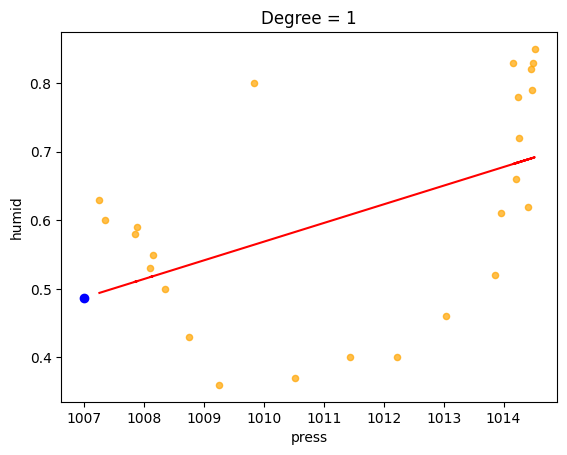

In [33]:
df.plot(x='press', y='humid', kind='scatter', alpha=0.7, c='orange')
plt.plot(X, y_preds, c='red')
plt.scatter(1007, y_new, c='blue')
plt.title('Degree = %d' %deg)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

print('*'*21)
print('**** Degree = %2d ****' %deg)
print('*'*21)
print()

# variance of the target explained by the independent variables.
# how well the model fits the data. Higher is better.
r2 = r2_score(y, y_preds) 

# Average squared distance between predicted and actual values
# Lower is better  (outliers will exegarate this)
mse = mean_squared_error(y, y_preds)

# Average absolute distance between predicted and actual values
# Lower is better
mae = mean_absolute_error(y, y_preds)

# Starting point of the regression line on the y-axis.
# value of target when independent variables are at zero
#intercept = lm.intercept_

print('R2   : %14.4f' %r2)  # same as linreg.score() ?
print('MAE  : %14.4f' %mae)
print('MSE  : %14.4f' %mse)
print('RMSE : %14.4f' %math.sqrt(mse))
print('Int  : %14.4f' %intercept)
#print('Coef : %14.4f' %lm.coef_[0])
print('Score: %14.4f' %poly_lm.score(X_poly, y))

*********************
**** Degree =  1 ****
*********************

R2   :         0.2428
MAE  :         0.1178
MSE  :         0.0183
RMSE :         0.1355
Int  :       -26.9462
Score:         0.2428
